<a href="https://colab.research.google.com/github/SaadS315/KNN/blob/main/assignment/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. A regression is used to predict numerical outcomes, while a classification predicts categorical outcomes.

2. A confusion table is used to measure how well a classification model is doing. It takes the model's predictions and compares it with actual results. By doing this, it helps us understand where the model is correct and where it is making mistakes.

3.  SSE is the sum of squared errors. It quantifies the unexplained variability between observed data points and the values that are predicted by a model.

4.  Overfitting is when a model becomes noisy because it has high training accuracy but bad results on fresh data. Underfitting is when a model has bad performance that is caused by it being too simple to learn patterns.

5. Splitting the data into training and testing sets can help better evaluate a model's performance. If k is chosen just based on how a model does with training sets, then you are only seeing how a model does with memorizing things, not identifying patterns.

6. The strengths of reporting a class label as a prediction are that it is simple and can be interpreted quickly. The weakness is that there is not enough information about the confidence of the decision. The strength of reporting as a probability distribution are that you know how confident the model is, but the downfall is that it is hard to interpret.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [19]:
# 1

df = pd.read_csv("USA_cars_datasets.csv")

df = df[["price", "year", "mileage"]]

df.isna().sum() # There are no NA's.

df.shape # Shape is (2499, 3)

df.describe()




,price,year,mileage
count,2499.000000,2499.000000,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04
std,12116.094936,3.442656,5.970552e+04
min,0.000000,1973.000000,0.000000e+00
25%,10200.000000,2016.000000,2.146650e+04
50%,16900.000000,2018.000000,3.536500e+04
75%,25555.500000,2019.000000,6.347250e+04
max,84900.000000,2020.000000,1.017936e+06


In [14]:
# 2

df["year"] = (df["year"] - df["year"].min()) / (df["year"].max() - df["year"].min())
df["mileage"] = (df["mileage"] - df["mileage"].min()) / (df["mileage"].max() - df["mileage"].min())


In [15]:
# 3

X_train, X_test, y_train, y_test = train_test_split(df[["year", "mileage"]], df["price"], test_size = 0.2, random_state = 42)

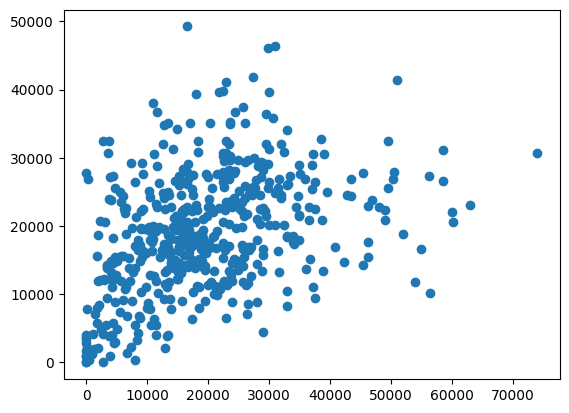

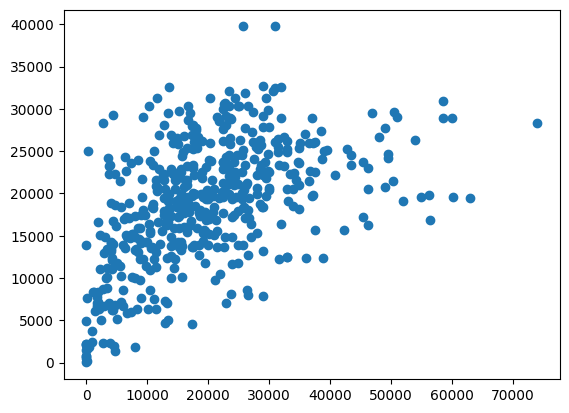

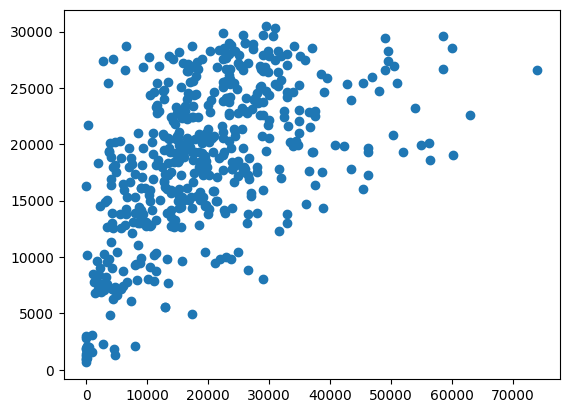

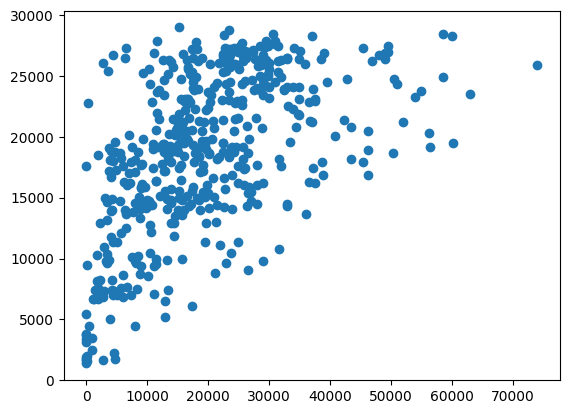

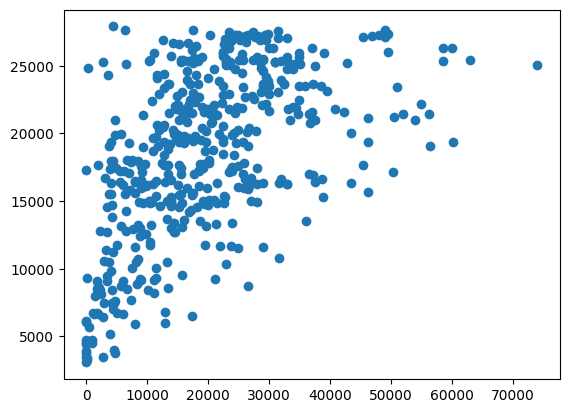

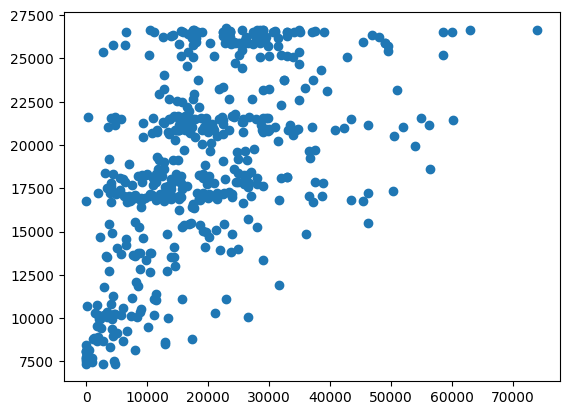

In [16]:
# 4

k_values = [3, 10, 25, 50, 100, 300]
results = {}

for k in k_values:
  model = KNeighborsRegressor(n_neighbors = k)
  model.fit(X_train, y_train)
  y_prediction = model.predict(X_test)
  mse = mean_squared_error(y_test, y_prediction)
  results[k] = mse
  plt.scatter(y_test, y_prediction)
  plt.show()



In [17]:
# 5

optimal = min(results, key=results.get)
print(optimal)

#The optimal k is 50


#6

# A smaller k leads to overfitting, because the model is reacting to the noise in the training data.
# On the other hand, a large k can result in underfitting, because the model is averaging over way too many neighbors.
# The optimal k is in the middle, and is 50. It is large enough to smooth out some of the noise from the dataset,
# but can also properly capture trends.

50


**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [30]:
# 1

animals_df = pd.read_csv("zoo.csv")

animals_df.head()

animals_df.shape # Shape is (101, 18)

animals_df.columns # animal, hair, feathers, eggs

for x in sorted(animals_df['class'].unique()):
    print(animals_df[animals_df['class'] == x]['animal'].values)

animals_df.describe()

print(animals_df['class'].value_counts())


['aardvark' 'antelope' 'bear' 'boar' 'buffalo' 'calf' 'cavy' 'cheetah'
 'deer' 'dolphin' 'elephant' 'fruitbat' 'giraffe' 'girl' 'goat' 'gorilla'
 'hamster' 'hare' 'leopard' 'lion' 'lynx' 'mink' 'mole' 'mongoose'
 'opossum' 'oryx' 'platypus' 'polecat' 'pony' 'porpoise' 'puma' 'pussycat'
 'raccoon' 'reindeer' 'seal' 'sealion' 'squirrel' 'vampire' 'vole'
 'wallaby' 'wolf']
['chicken' 'crow' 'dove' 'duck' 'flamingo' 'gull' 'hawk' 'kiwi' 'lark'
 'ostrich' 'parakeet' 'penguin' 'pheasant' 'rhea' 'skimmer' 'skua'
 'sparrow' 'swan' 'vulture' 'wren']
['pitviper' 'seasnake' 'slowworm' 'tortoise' 'tuatara']
['bass' 'carp' 'catfish' 'chub' 'dogfish' 'haddock' 'herring' 'pike'
 'piranha' 'seahorse' 'sole' 'stingray' 'tuna']
['frog' 'frog' 'newt' 'toad']
['flea' 'gnat' 'honeybee' 'housefly' 'ladybird' 'moth' 'termite' 'wasp']
['clam' 'crab' 'crayfish' 'lobster' 'octopus' 'scorpion' 'seawasp' 'slug'
 'starfish' 'worm']
class
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: i

In [21]:
# 2

X = animals_df.drop(columns = ["animal", "class"])
y = animals_df["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    random_state=42,
    stratify=y
)

In [31]:
# 3

from sklearn.metrics import confusion_matrix, accuracy_score
# small dataset so smaller k values

k_values = [1, 3, 5, 7, 9, 11]

results = {}

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results[k] = acc

In [24]:
# 4

k_optimal = max(results, key = results.get)
print("Optimal k is " + str(k_optimal))

model = KNeighborsClassifier(n_neighbors = k_optimal)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

# Most classes are predicted accurately. It is only incorrect around a few times, which is probably due to similarity between classes.

Optimal k is1
[[21  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  1  0  4]]


In [29]:
# 5

X_new = animals_df[['milk', 'aquatic', 'airborne']]
y = animals_df['class']



X_train, X_test, y_train, y_test = train_test_split(
    X_new, y,
    test_size=0.5,
    random_state=42,
    stratify=y
)


model_new = KNeighborsClassifier(n_neighbors=k_optimal)
model_new.fit(X_train, y_train)
y_pred_new = model_new.predict(X_test)

y_pred_new = model_new.predict(X_test)

confusion_matrix(y_test, y_pred_new)
print(confusion_matrix)

probabilities = model_new.predict_proba(X_test.values)
print(probabilities)

# Lots of classes show 0. Not all classes are represented. Using these three variables alone is not enough to accurately predict classes.




<function confusion_matrix at 0x7dbe86909800>
[[0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [32]:
from scipy.spatial.distance import cdist


# defining Gaussian, Uniform, and Epanechnikov
def gaussian_kernel(z):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * z**2)

def uniform_kernel(z):
    return 0.5 * (np.abs(z) <= 1)

def epanechnikov_kernel(z):
    return 0.75 * (1 - z**2) * (np.abs(z) <= 1)


def kde(data, kernel = "gaussian", bandwidth = None, grid_points = 500):
  x = np.asarray(data).reshape(-1, 1)
  n = len(x)
  if bandwidth is None:
        std = np.std(x, ddof=1)
        bandwidth = 1.06 * std * n**(-1/5)
  if kernel == 'gaussian':
        K = gaussian_kernel
  elif kernel == 'uniform':
        K = uniform_kernel
  elif kernel == 'epanechnikov':
        K = epanechnikov_kernel


  x_min, x_max = x.min(), x.max()
  grid = np.linspace(x_min - 3*bandwidth,
                    x_max + 3*bandwidth,
                    grid_points).reshape(-1, 1)

  z = (grid - x.T) / bandwidth
  kernels = K(z)
  density = np.sum(kernels, axis=1) / (n * bandwidth)
  return grid.flatten(), density




<Axes: >

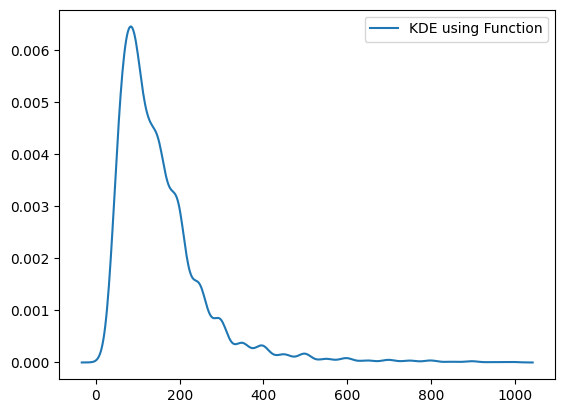

In [33]:
# Testing function with airbnb dataset using the price variable.

df = pd.read_csv("airbnb_hw.csv")

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df_price = df["Price"].dropna()

grid, density = kde(df_price, kernel="gaussian")


sns.lineplot(x = grid, y = density, label = "KDE using Function")




<Axes: xlabel='Price', ylabel='Density'>

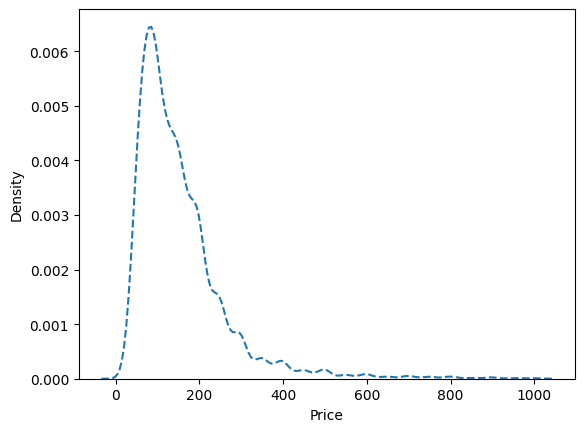

In [34]:
sns.kdeplot(df_price, bw_method='silverman',
            linestyle='--',
            label="Seaborn KDE")

# Looks similar to the one made by the function.